# Chapter 11: Working with Unlabeled Data - Clustering Analysis

## centroid based clustering (K means)

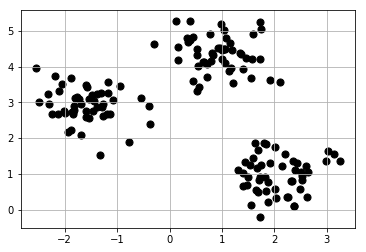

In [3]:
%matplotlib inline
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=150, n_features=2, centers=3,
                 cluster_std=0.5, shuffle=True, random_state=0)

import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c='black', marker='o', s=50)
plt.grid()
plt.show()

1. similarity measure (distance)
2. poor initial centroids -> K-means++
3. empty cluster
4. choose reasonable k

Hard clustering: K-means  
Soft clutering: fuzzy C-means (FCM)

In [4]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3,
            init='random',
            n_init=10, # 10 independent random initialization
            max_iter=300, # maximum iteration each run
            tol=1e-04, # SSE tolerance
            random_state=0)
y_km = km.fit_predict(X)

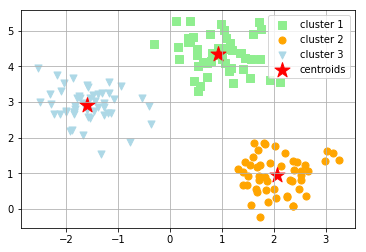

In [5]:
plt.scatter(X[y_km==0, 0], X[y_km==0, 1], s=50,
           c='lightgreen', marker='s', label='cluster 1')
plt.scatter(X[y_km==1, 0], X[y_km==1, 1], s=50,
           c='orange', marker='o', label='cluster 2')
plt.scatter(X[y_km==2, 0], X[y_km==2, 1], s=50,
           c='lightblue', marker='v', label='cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
           km.cluster_centers_[:, 1],
           s=250, marker='*', c='red', label='centroids')
plt.legend()
plt.grid()
plt.show()

### Find k use elbow method

In [6]:
print('Distortion: %.2f' % km.inertia_)

Distortion: 72.48


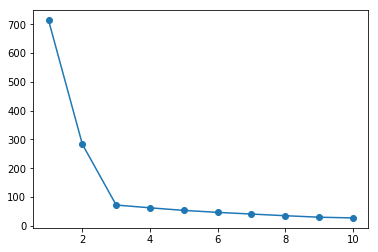

In [7]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++',
               n_init=10, max_iter=300, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.show()

### qualifying the quality of clustering via silhouette plots

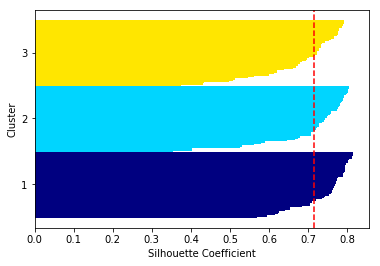

In [8]:
km = KMeans(n_clusters=3, init='k-means++',
            n_init=10, max_iter=300, tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals,
            height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color='red', linestyle='--')
plt.yticks(yticks, cluster_labels+1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette Coefficient')
plt.show()

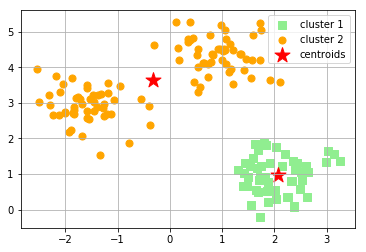

In [9]:
km = KMeans(n_clusters=2, init='k-means++',
            n_init=10, max_iter=300, tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

plt.scatter(X[y_km==0, 0], X[y_km==0, 1], s=50,
           c='lightgreen', marker='s', label='cluster 1')
plt.scatter(X[y_km==1, 0], X[y_km==1, 1], s=50,
           c='orange', marker='o', label='cluster 2')
plt.scatter(km.cluster_centers_[:, 0],
           km.cluster_centers_[:, 1],
           s=250, marker='*', c='red', label='centroids')
plt.legend()
plt.grid()
plt.show()

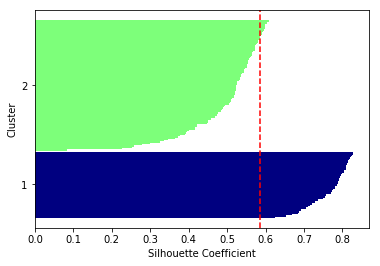

In [10]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals,
            height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color='red', linestyle='--')
plt.yticks(yticks, cluster_labels+1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette Coefficient')
plt.show()

## hierarchical clustering

1. agglomerative
2. divisive


1. single linkage
2. compolete linkage
3. average linkage
4. Ward's linkage

In [11]:
import pandas as pd
np.random.seed(123)
variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']
X = np.random.random_sample([5,3])*10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


In [12]:
# Distance matrix
from scipy.spatial.distance import pdist, squareform
row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')),
                       columns=labels, index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


In [13]:
pdist(df, metric='euclidean')

array([ 4.973534  ,  5.51665266,  5.89988504,  3.83539555,  4.34707339,
        5.10431109,  6.69823298,  7.24426159,  8.31659367,  4.382864  ])

In [14]:
from scipy.cluster.hierarchy import linkage
row_clusters = linkage(pdist(df, metric='euclidean'),
                       method='complete')
# or row_clusters = linkage(df.values, method='complete', metric='euclidean')
# do not input row_dist
pd.DataFrame(row_clusters,
             columns=['row label 1',
                    'row label 2',
                    'distance',
                    'no. of items in clust.'],
             index=['cluster %d' %(i+1) for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


In [15]:
row_clusters = linkage(df.values, method='complete', metric='euclidean')
pd.DataFrame(row_clusters, 
             columns=['row label 1', 'row label 2', 'distance', 'no. of items in clust.'],
             index=['cluster %d' %(i+1) for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


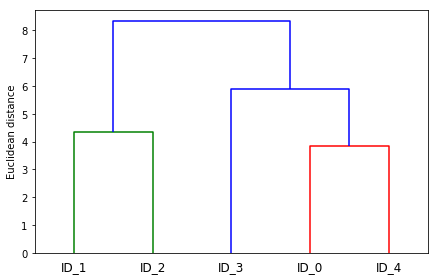

In [16]:
from scipy.cluster.hierarchy import dendrogram

# make dendrogram black (part 1/2)
# from scipy.cluster.hierarchy import set_link_color_palette
# set_link_color_palette(['black'])

row_dendr = dendrogram(row_clusters, 
                       labels=labels,
                       # make dendrogram black (part 2/2)
                       # color_threshold=np.inf
                       )
plt.tight_layout()
plt.ylabel('Euclidean distance')
#plt.savefig('./figures/dendrogram.png', dpi=300, 
#            bbox_inches='tight')
plt.show()

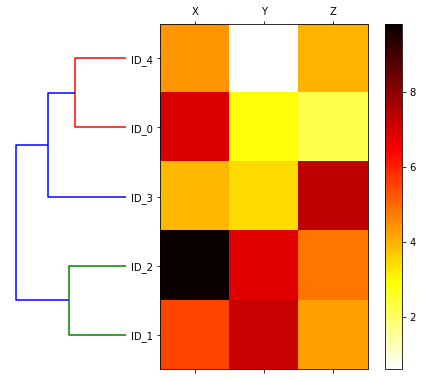

In [18]:
fig = plt.figure(figsize=(8,8))
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])
row_dendr = dendrogram(row_clusters, orientation='left')
df_rowclust = df.ix[row_dendr['leaves'][::-1]]
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')
axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
    i.set_visible(False)
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))
plt.show()

In [25]:
row_dendr['leaves']

[1, 2, 3, 0, 4]

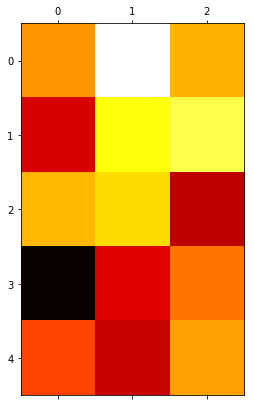

In [23]:
plt.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')
plt.show()

In [25]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean',
                            linkage='complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [0 1 1 0 0]


## Density-based Spatial Clustering of Applications with Noise (DBSCAN)

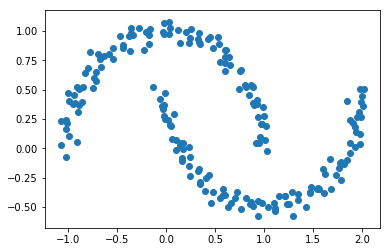

In [26]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05,  random_state=0)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

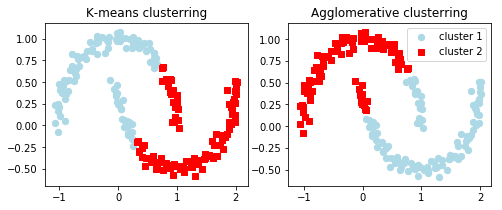

In [27]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3))
km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km==0, 0], X[y_km==0, 1],
           c='lightblue', marker='o', s=40,
           label='cluster 1')
ax1.scatter(X[y_km==1, 0], X[y_km==1, 1],
           c='red', marker='s', s=40,
           label='cluster 2')
ax1.set_title('K-means clusterring')

ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean',
                            linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac==0, 0], X[y_ac==0, 1],
           c='lightblue', marker='o', s=40,
           label='cluster 1')
ax2.scatter(X[y_ac==1, 0], X[y_ac==1, 1],
           c='red', marker='s', s=40,
           label='cluster 2')
ax2.set_title('Agglomerative clusterring')
plt.legend()
plt.show()

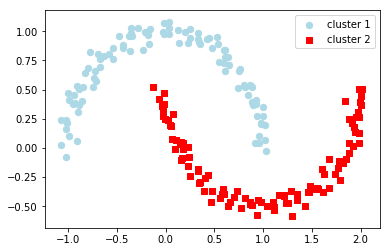

In [28]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db==0, 0], X[y_db==0, 1],
           c='lightblue', marker='o', s=40,
           label='cluster 1')
plt.scatter(X[y_db==1, 0], X[y_db==1, 1],
           c='red', marker='s', s=40,
           label='cluster 2')
plt.legend()
plt.show()

## Summary  
1. centroid based clustering (spherical shape)
2. hierarchical clustering
3. density-based clustering
4. graph-based clustering (spectral clustering algorithms), not mentioned


1. hyperparameters tuning
2. distance metric (the curse of dimensionality)